# Import

In [1]:
import numpy
import pandas as pd
import datetime
import  missingno as msno
import matplotlib.pyplot as plt 

# Hello Data

In [2]:
df = pd.read_csv("/mnt/c/Users/Green.PC/Documents/howsam/project/p1_smoke_detection_iot/smoke-detection-iot/data/smoke_detection_iot.csv")
df.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [3]:
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [4]:
print(f"Rows of Data: {df.shape[0]}")
print(f"Column of Data: {df.shape[1]}")

Rows of Data: 62630
Column of Data: 15


In [5]:
df.columns = ['UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
              'Raw_H2', 'Raw_Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5',
              'NC1.0', 'NC2.5', 'CNT', 'Fire_Alarm']
df.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw_H2,Raw_Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire_Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [6]:
df.dtypes

UTC                 int64
Temperature[C]    float64
Humidity[%]       float64
TVOC[ppb]           int64
eCO2[ppm]           int64
Raw_H2              int64
Raw_Ethanol         int64
Pressure[hPa]     float64
PM1.0             float64
PM2.5             float64
NC0.5             float64
NC1.0             float64
NC2.5             float64
CNT                 int64
Fire_Alarm          int64
dtype: object

In [7]:
df = df.astype('float')
df.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw_H2,Raw_Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire_Alarm
0,1.654733e+09,20.000,57.36,0.0,400.0,12306.0,18520.0,939.735,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.654733e+09,20.015,56.67,0.0,400.0,12345.0,18651.0,939.744,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.654733e+09,20.029,55.96,0.0,400.0,12374.0,18764.0,939.738,0.0,0.0,0.0,0.0,0.0,2.0,0.0
3,1.654733e+09,20.044,55.28,0.0,400.0,12390.0,18849.0,939.736,0.0,0.0,0.0,0.0,0.0,3.0,0.0
4,1.654733e+09,20.059,54.69,0.0,400.0,12403.0,18921.0,939.744,0.0,0.0,0.0,0.0,0.0,4.0,0.0


# Datatime

In [8]:
dt_utc = [datetime.date.fromtimestamp(i) for i in df['UTC']]
dt_utc[:5]

[datetime.date(2022, 6, 9),
 datetime.date(2022, 6, 9),
 datetime.date(2022, 6, 9),
 datetime.date(2022, 6, 9),
 datetime.date(2022, 6, 9)]

In [9]:
time = pd.Series(dt_utc)
time[:5]

0    2022-06-09
1    2022-06-09
2    2022-06-09
3    2022-06-09
4    2022-06-09
dtype: object

In [10]:
df.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw_H2,Raw_Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire_Alarm
0,1.654733e+09,20.000,57.36,0.0,400.0,12306.0,18520.0,939.735,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.654733e+09,20.015,56.67,0.0,400.0,12345.0,18651.0,939.744,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.654733e+09,20.029,55.96,0.0,400.0,12374.0,18764.0,939.738,0.0,0.0,0.0,0.0,0.0,2.0,0.0
3,1.654733e+09,20.044,55.28,0.0,400.0,12390.0,18849.0,939.736,0.0,0.0,0.0,0.0,0.0,3.0,0.0
4,1.654733e+09,20.059,54.69,0.0,400.0,12403.0,18921.0,939.744,0.0,0.0,0.0,0.0,0.0,4.0,0.0


In [11]:
df.insert(0 , "Time" , time)
df.drop("UTC" , axis=1 , inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Time            62630 non-null  object 
 1   Temperature[C]  62630 non-null  float64
 2   Humidity[%]     62630 non-null  float64
 3   TVOC[ppb]       62630 non-null  float64
 4   eCO2[ppm]       62630 non-null  float64
 5   Raw_H2          62630 non-null  float64
 6   Raw_Ethanol     62630 non-null  float64
 7   Pressure[hPa]   62630 non-null  float64
 8   PM1.0           62630 non-null  float64
 9   PM2.5           62630 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62630 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  CNT             62630 non-null  float64
 14  Fire_Alarm      62630 non-null  float64
dtypes: float64(14), object(1)
memory usage: 7.2+ MB


# Missing Value

<Axes: >

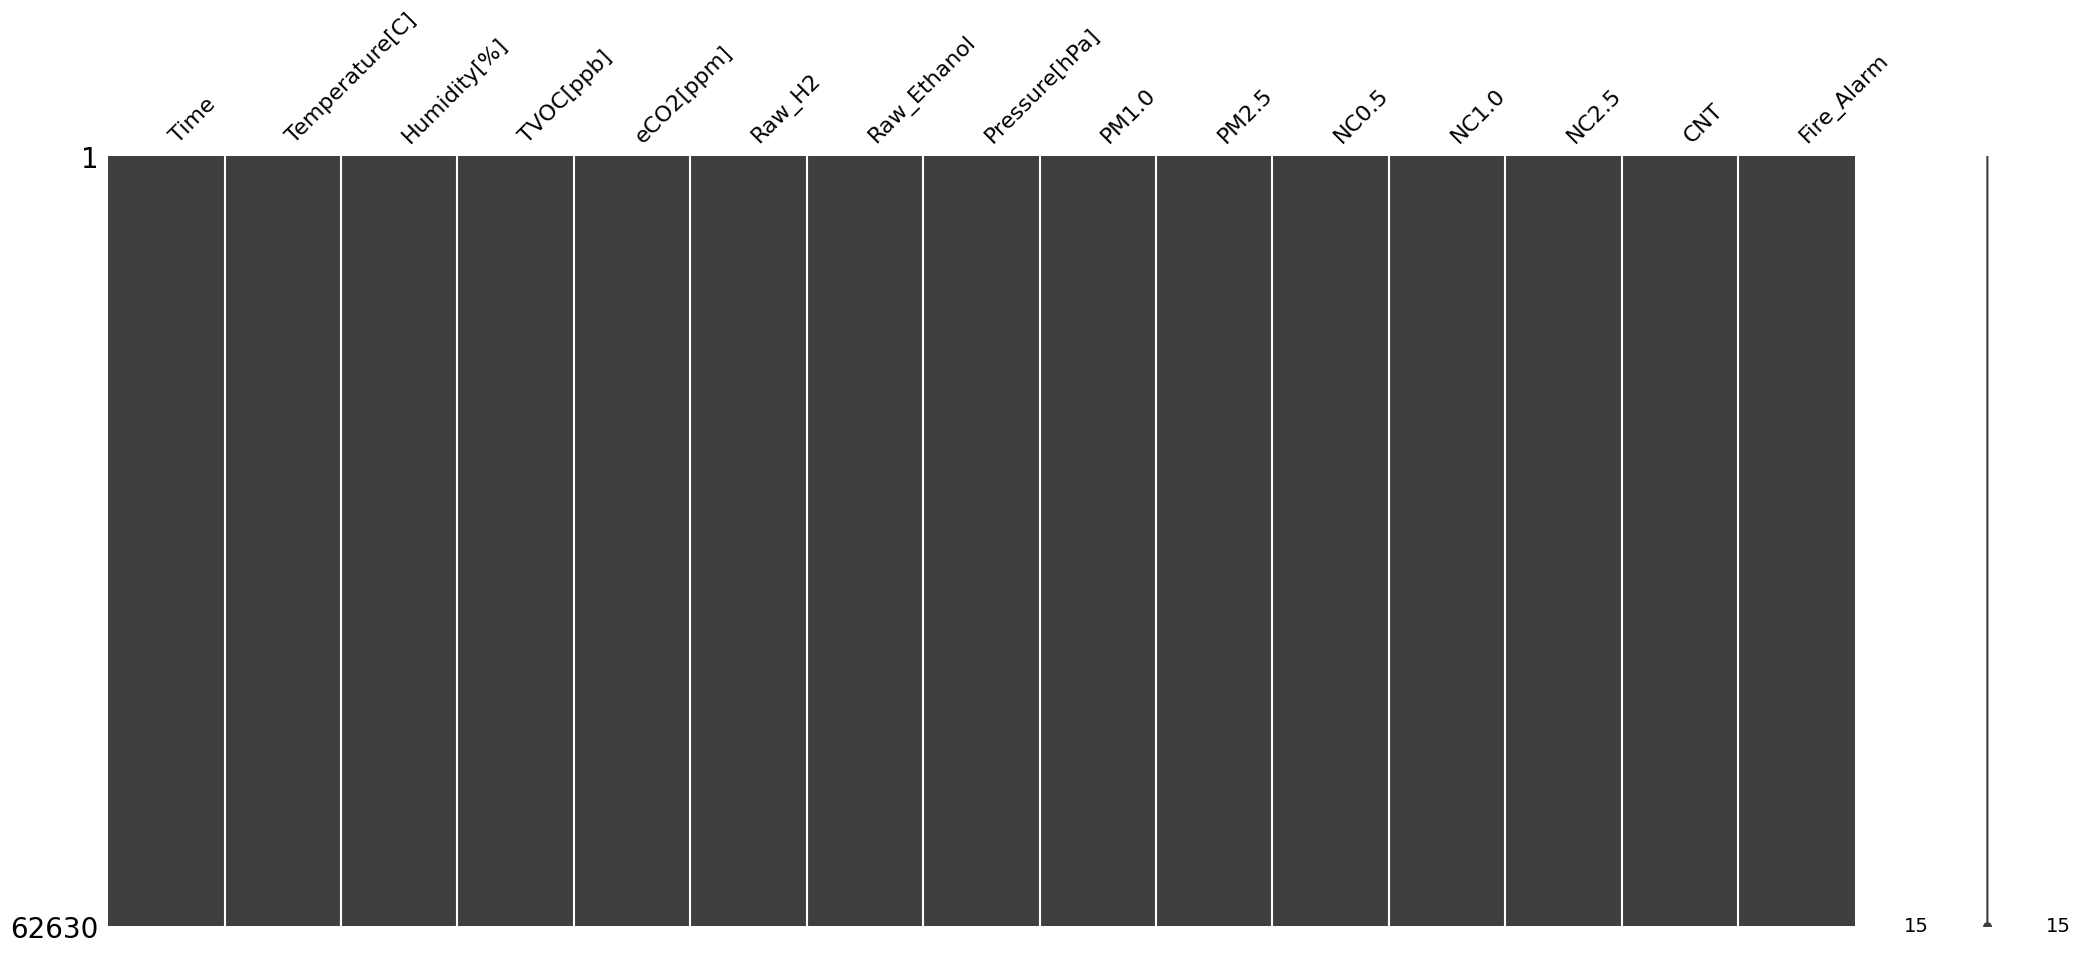

In [12]:
msno.matrix(df)

In [13]:
df.isna().sum()

Time              0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw_H2            0
Raw_Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire_Alarm        0
dtype: int64